In [3]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('')
print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11490434/11490434 [==============================] - 0s 0us/step

x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


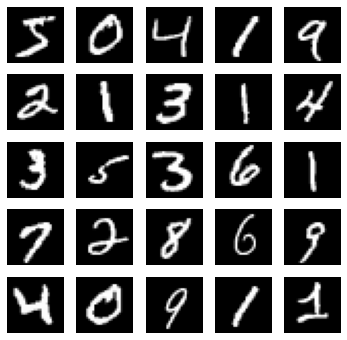

In [5]:
plt.figure(figsize=(6,6))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.show()

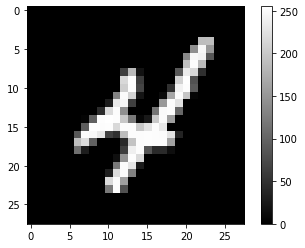

In [6]:
plt.imshow(x_train[9], cmap='gray')
plt.colorbar()
plt.show()


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train max = ', x_train[0].max(), ' , x_train min = ', x_train[0].min())
print('x_test max = ', x_test[0].max(), ' , x_test min = ', x_test[0].min())



x_train max =  1.0  , x_train min =  0.0
x_test max =  1.0  , x_test min =  0.0


In [8]:
t_train = to_categorical(t_train,10)
t_test = to_categorical(t_test,10)

print('train label =', t_train[0], ',decimal value =', np.argmax(t_train[0]))
print('test label =', t_test[0], ',decimal value =', np.argmax(t_test[0]))


train label = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] ,decimal value = 5
test label = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] ,decimal value = 7


In [9]:
# sequential model construction

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)


Epoch 1/30
1500/1500 [==============================] - 7s 3ms/step - loss: 0.7147 - accuracy: 0.8153 - val_loss: 0.3805 - val_accuracy: 0.8987
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3628 - accuracy: 0.8991 - val_loss: 0.3127 - val_accuracy: 0.9122
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3104 - accuracy: 0.9122 - val_loss: 0.2783 - val_accuracy: 0.9226
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2803 - accuracy: 0.9206 - val_loss: 0.2562 - val_accuracy: 0.9272
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2582 - accuracy: 0.9271 - val_loss: 0.2390 - val_accuracy: 0.9322
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2406 - accuracy: 0.9316 - val_loss: 0.2243 - val_accuracy: 0.9357
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2254 - accuracy: 0.9359 - val_loss: 0.2144 - val_accuracy:

In [12]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9680


[0.10971412062644958, 0.9679999947547913]

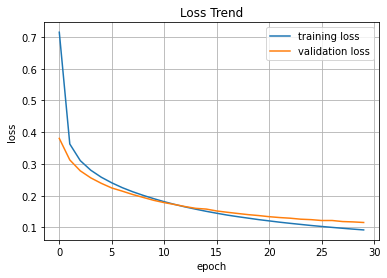

In [13]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

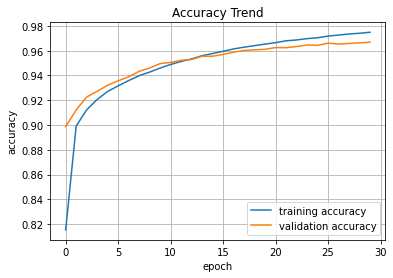

In [14]:
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

In [15]:
pred=model.predict(x_test)
print(pred.shape)
print(pred[:5])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[1.01578160e-04 8.96635921e-09 9.59363359e-04 3.79662728e-03
  1.60805669e-07 6.90962634e-06 7.12576309e-09 9.95025694e-01
  7.76769411e-06 1.01783146e-04]
 [3.82925573e-05 1.71988751e-04 9.97908592e-01 1.40748592e-03
  9.76065201e-11 2.34818348e-04 1.68376588e-04 3.00265895e-10
  7.03726473e-05 2.83309515e-10]
 [6.06678113e-05 9.88518298e-01 2.13936460e-03 8.90885189e-04
  3.41192965e-04 4.82593256e-04 5.84186870e-04 3.95570090e-03
  2.84350407e-03 1.83607568e-04]
 [9.97918904e-01 5.09775466e-09 1.13127928e-03 2.67573287e-05
  5.16832552e-06 3.29122013e-05 3.11471114e-04 1.48670326e-04
  1.73341436e-06 4.23024176e-04]
 [1.82398930e-04 2.53390766e-07 5.26389340e-04 3.79720427e-06
  9.74603236e-01 8.96982419e-06 4.82954027e-04 2.14227429e-03
  3.58003803e-04 2.16916353e-02]]
